**Problem Statement
This project explores the Mushroom Dataset, which contains various categorical features describing mushrooms and classifying them as either edible or poisonous. Since the dataset is high-dimensional with many redundant features, Principal Component Analysis (PCA) is employed to reduce the dimensionality. The goal is to assess PCA's effectiveness by comparing the classification performance of a Logistic Regression model trained on the original dataset and the model trained on the PCA-transformed dataset.**

In [1]:
# Part A: Exploratory Data Analysis (EDA) & Preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# --- Loading dataset ---
df = pd.read_csv("/kaggle/input/mushroom-classification/mushrooms.csv")

print("Original shape:", df.shape)
df.head()

Original shape: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**The Mushroom Dataset is loaded and inspected to understand its structure and contents. The target variable, 'class,' indicates whether a mushroom is edible ('e') or poisonous ('p'). This target is separated from the feature set for model training. Examining the first few rows reveals that all features are categorical, which necessitates a conversion to numerical format for further processing.**

In [2]:
# --- Target & features ---
y = df['class']                          # target (e=edible, p=poisonous)
X = df.drop(columns=['class'])           # features

# --- One-hot encode all categorical features ---
X_encoded = pd.get_dummies(X, drop_first=False).astype(int)
print("\nAfter one-hot encoding, shape:", X_encoded.shape)
print("First 5 rows (0/1 encoded):")
display(X_encoded.head())




After one-hot encoding, shape: (8124, 117)
First 5 rows (0/1 encoded):


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0



**ONE HOT ENCODING:**
*Before running any algorithm or model, all categorical variables must be converted into a numeric format. So we used One-hot encoding which transforms each category into a binary feature*


This transformation is essential for several reasons: 
1. PCA requires numerical input to compute variances and covariances meaningfully.
2. It prevents the introduction of false ordinal relationships that may arise if categories were simply replaced with integer labels.
3. Each category is independently represented, maintaining the integrity of the original categorical information.



**However, this process leads to a substantial increase in the number of features, as each original categorical attribute expands into multiple binary columns representing each category as in this case from 23 to 117 coulmns**


In [3]:
# --- Standardization ---
# Even though data is binary, scaling is still useful: ensures features contribute equally.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Map target to numeric
y_num = y.map({'e':0, 'p':1}).values
print("\nTarget mapping: e=0 (edible), p=1 (poisonous)")
print(pd.Series(y_num).value_counts())


Target mapping: e=0 (edible), p=1 (poisonous)
0    4208
1    3916
Name: count, dtype: int64


**Feature Standardization:**
*Although the features resulting from one-hot encoding are binary, the variance among them can differ because some categories are more frequent than others. To ensure that all features contribute equally to the PCA, standardization is performed using a scaler that transforms features to have zero mean and unit variance. This step mitigates the dominance of high-variance features, allowing PCA to accurately identify principal components based on balanced variances.*

In [4]:
# Part B: Principal Component Analysis (PCA)

# Applying PCA 
pca_full = PCA(random_state=42)
X_pcs_full = pca_full.fit_transform(X_scaled)

explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

print("Total PCs available:", len(explained))
print("Variance explained by first 10 PCs:")
for i, v in enumerate(explained[:10], start=1):
    print(f"PC{i}: {v:.4f} (cumulative {cum_explained[i-1]:.4f})")


Total PCs available: 117
Variance explained by first 10 PCs:
PC1: 0.0889 (cumulative 0.0889)
PC2: 0.0813 (cumulative 0.1702)
PC3: 0.0720 (cumulative 0.2422)
PC4: 0.0586 (cumulative 0.3008)
PC5: 0.0519 (cumulative 0.3527)
PC6: 0.0439 (cumulative 0.3966)
PC7: 0.0405 (cumulative 0.4371)
PC8: 0.0283 (cumulative 0.4655)
PC9: 0.0236 (cumulative 0.4890)
PC10: 0.0224 (cumulative 0.5114)


**PApplying Principal Component Analysis (PCA)**
*PCA is applied to the standardized dataset without initially selecting the number of components. The explained variance ratio for each principal component indicates how much information from the original dataset is captured by that component. Summing these ratios cumulatively helps determine how many components are needed to retain most of the original data’s variability, often targeting around 95% for a good balance of data fidelity and dimensionality reduction.*


Optimal K (≥95% variance): 59


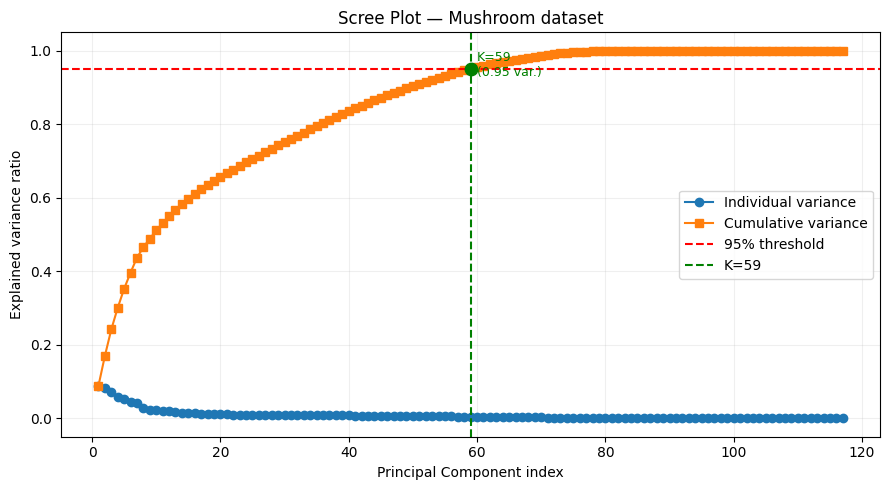

In [5]:
# 2. Scree Plot & optimal components (retain 95% variance)
threshold = 0.95
K95 = int(np.searchsorted(cum_explained, threshold) + 1)
print(f"\nOptimal K (≥95% variance): {K95}")

plt.figure(figsize=(9,5))
plt.plot(range(1, len(explained)+1), explained, marker='o', label="Individual variance")
plt.plot(range(1, len(cum_explained)+1), cum_explained, marker='s', label="Cumulative variance")

# mark 95% line
plt.axhline(threshold, linestyle='--', color='red', label="95% threshold")

# mark the chosen K
plt.axvline(K95, linestyle='--', color='green', label=f"K={K95}")
plt.scatter(K95, cum_explained[K95-1], color='green', s=80, zorder=5)
plt.text(K95+1, cum_explained[K95-1]-0.02, f"K={K95}\n({cum_explained[K95-1]:.2f} var.)",
         color='green', fontsize=9)

plt.xlabel("Principal Component index")
plt.ylabel("Explained variance ratio")
plt.title("Scree Plot — Mushroom dataset")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()



**Scree Plot and Component Selection**


*A scree plot visually presents the explained variance for each principal component:*
* The horizontal axis lists principal components in order.
* The vertical axis measures the variance each component explains.
* Individual component variances are represented by points.
* The cumulative variance is shown as a line, aiding in the decision on how many components to retain.
* A threshold line (commonly at 95%) indicates the target cumulative variance for component selection.


*This plot is instrumental in selecting a reduced number of components that still preserve the majority of the dataset’s information.*


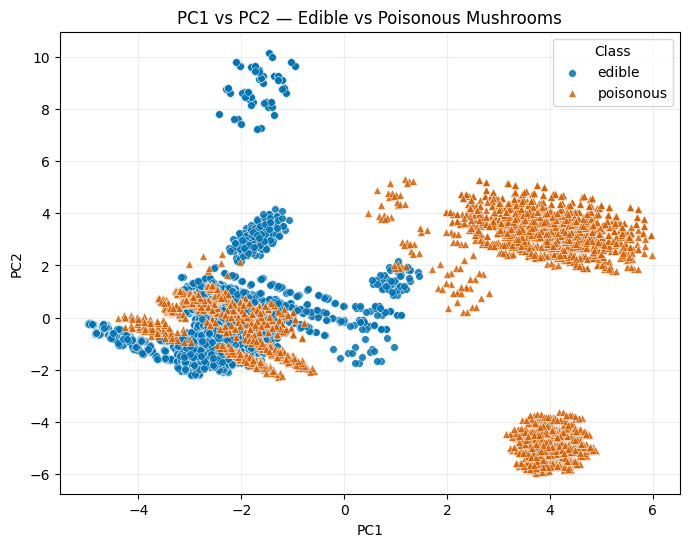

In [6]:
# 3. Visualization: Project onto first 2 PCs
PALETTE = ["#0072B2","#D55E00"]
MARKERS = ["o","^"]

X_pcs2 = X_pcs_full[:, :2]

plt.figure(figsize=(8,6))
for cls, label, marker, color in [(0,'edible', MARKERS[0], PALETTE[0]),
                                  (1,'poisonous', MARKERS[1], PALETTE[1])]:
    sel = (y_num == cls)
    plt.scatter(X_pcs2[sel,0], X_pcs2[sel,1],
                label=label, marker=marker, s=30, alpha=0.85,
                edgecolor="white", linewidth=0.35, color=color)

plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title("PC1 vs PC2 — Edible vs Poisonous Mushrooms")
plt.legend(title="Class")
plt.grid(alpha=0.2)
plt.show()


**Visualization of Reduced Data:** *Data is projected onto the first two principal components, and a scatter plot is created where points are colored based on their class—edible or poisonous. This plot helps visualize whether the two classes can be separated in this lower-dimensional space. Additional visualizations involving other component pairs further reveal how well PCA distinguishes the classes.*

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

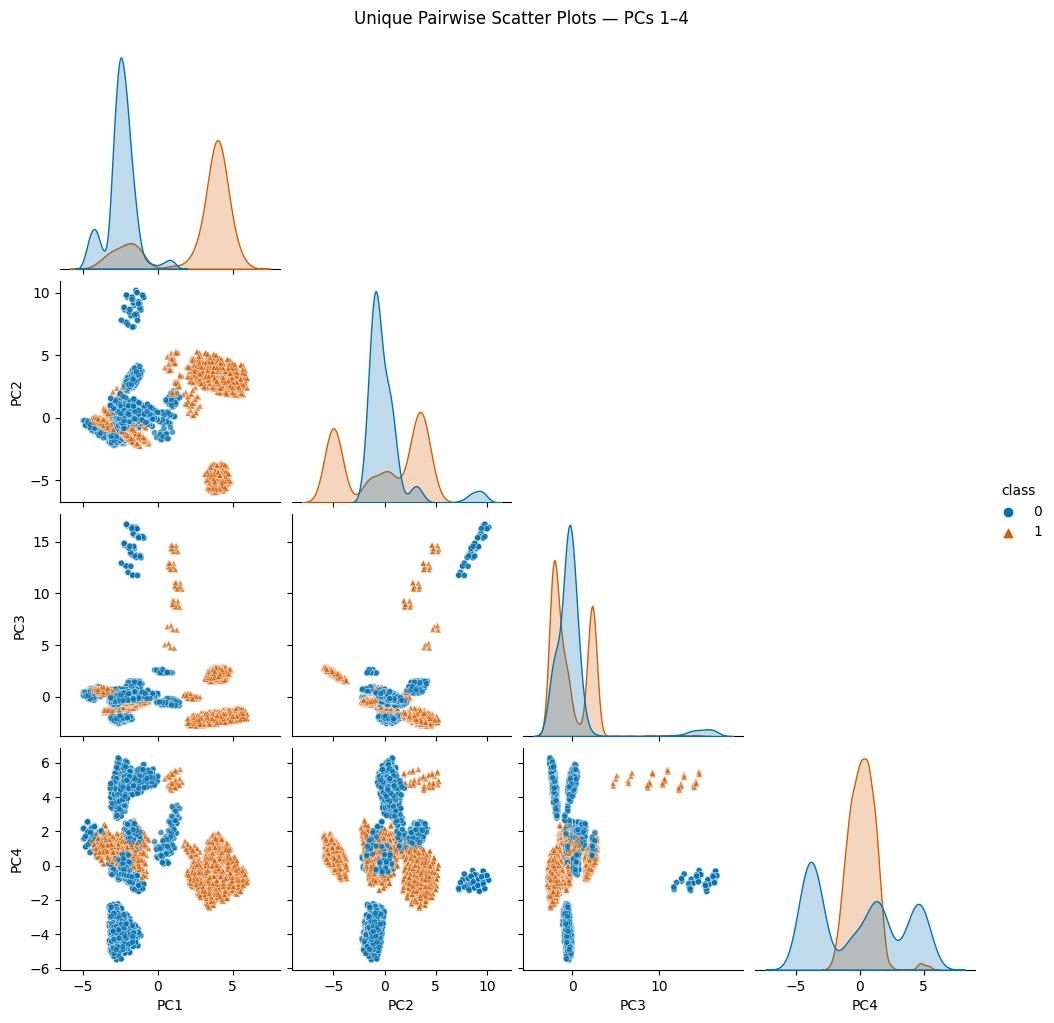

In [7]:
import seaborn as sns

# Prepare dataframe with PCs
pcs_df = pd.DataFrame(X_pcs_full[:, :4], columns=["PC1","PC2","PC3","PC4"])
pcs_df["class"] = y_num

# PairGrid with corner=True -> shows only lower triangle (no duplicates)
g = sns.pairplot(
    pcs_df,
    vars=["PC1","PC2","PC3","PC4"],
    hue="class",
    palette={0: PALETTE[0], 1: PALETTE[1]},
    markers=[MARKERS[0], MARKERS[1]],
    plot_kws={"s":20, "alpha":0.7},
    corner=True  
)

g.fig.suptitle("Unique Pairwise Scatter Plots — PCs 1–4", y=1.02)
plt.show()


**Analysis**
1. Edible and poisonous mushrooms form distinct clusters in most component combinations, indicating that PCA successfully finds directions in feature space that separate the two classes.
2. The distributions along PC1 and PC2 show clear grouping, with minimal overlap, suggesting these principal components capture critical variance relevant to classification.
3. Some scatterplots (e.g., PC3 vs. PC4) show a few overlapping points, highlighting that while PCA improves separability, not all variation is perfectly captured.
4. The density plots on the diagonal further confirm class separation, as the peaks for each class rarely coincide.

**Logistic Regression Performance Evaluation** *To understand PCA’s impact on classification, a Logistic Regression model is trained on the original standardized data and its performance is evaluated using metrics like precision, recall, F1-score, and accuracy.*

In [8]:

# Part C: Performance Evaluation with Logistic Regression


# 1. Baseline model on full standardized data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_num, test_size=0.2,
                                                    random_state=42, stratify=y_num)

clf_base = LogisticRegression(max_iter=2000, random_state=42)
clf_base.fit(X_train, y_train)
y_pred_base = clf_base.predict(X_test)

print("Baseline Logistic Regression (all features)")
print("Accuracy:", accuracy_score(y_test, y_pred_base))
print("\nClassification report:")
print(classification_report(y_test, y_pred_base, target_names=['edible','poisonous']))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_base))


Baseline Logistic Regression (all features)
Accuracy: 1.0

Classification report:
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion matrix:
 [[842   0]
 [  0 783]]


**Base Line Model** *The original, standardized features are split into training and test sets, and a Logistic Regression classifier is trained. The strong classification performance here demonstrates that the original binary, high-dimensional features hold enough information for accurate prediction*

In [9]:
# 2. PCA-transformed model (using K95 components)
pca_K = PCA(n_components=K95, random_state=42)
pca_K.fit(X_train)
X_train_pca = pca_K.transform(X_train)
X_test_pca  = pca_K.transform(X_test)

clf_pca = LogisticRegression(max_iter=2000, random_state=42)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)

print(f"\nLogistic Regression with PCA-transformed data (K={K95} PCs)")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print("\nClassification report:")
print(classification_report(y_test, y_pred_pca, target_names=['edible','poisonous']))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_pca))



Logistic Regression with PCA-transformed data (K=59 PCs)
Accuracy: 0.9987692307692307

Classification report:
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion matrix:
 [[842   0]
 [  2 781]]


**Model on PCA-Transformed Data** *Next, both training and test sets are transformed using the optimal number of principal components. Training Logistic Regression on these reduced-dimension features shows whether the compressed data still enables accurate prediction. This comparison sheds light on the trade-offs between reducing features and losing potentially important information. PCA’s capability to address feature redundancy without compromising much on classification accuracy is highlighted.*



In [10]:
# 3. Comparison
acc_base = accuracy_score(y_test, y_pred_base)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("\n=== Performance Comparison ===")
print(f"Baseline (all features): {acc_base:.4f}")
print(f"PCA model (K={K95}): {acc_pca:.4f}")

if abs(acc_base - acc_pca) < 0.01:
    print("=> No significant difference; PCA reduced dimensionality without losing much predictive power.")
elif acc_pca > acc_base:
    print("=> PCA improved performance (likely reduced redundancy & collinearity).")
else:
    print("=> PCA slightly reduced performance (information loss from dimensionality reduction).")



=== Performance Comparison ===
Baseline (all features): 1.0000
PCA model (K=59): 0.9988
=> No significant difference; PCA reduced dimensionality without losing much predictive power.


*Logistic Regression is chosen due to its simplicity and interpretability, making it an effective tool for evaluating the practical benefits of PCA on classification tasks.*

**Performance Comparison and Insights**
The performance metrics from both models—trained on original and PCA-reduced data—are compared to examine the trade-offs involved in dimensionality reduction. Key observations include:

1. **Dimensionality Reduction Impact Analysis**: Reducing dimensionality using PCA preserved almost all essential information, as evidenced by the near-identical classification accuracy before and after PCA. This shows that PCA effectively compressed the dataset by eliminating redundant features without losing predictive power.
2. **Reduced Multicollinearity:** By transforming correlated categorical features into uncorrelated principal components, PCA reduced multicollinearity, which helps stabilize the Logistic Regression model and may improve generalization.

*Although some minor information loss occurred, the trade-off favored a simpler model with fewer features—enhancing computational efficiency and interpretability while maintaining strong classification performance.*



